## Importing Necessary Libraries

In [21]:
import joblib
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, StandardScaler

## Feature Engineering

* Check correlation

In [17]:
full_df = pd.read_excel("../data/dataset_v2.xlsx")
full_df.shape

(611, 18)

<Axes: >

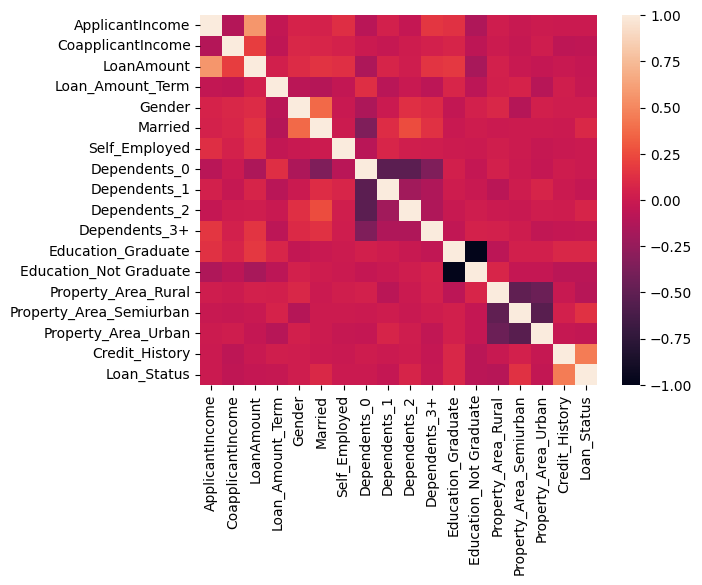

In [4]:
sns.heatmap(full_df.corr())

## Feature Generation


1. **Total Income**: Combine `ApplicantIncome` and `CoapplicantIncome` to create a new feature representing the total income of the applicant and co-applicant.

2. **Loan Amount to Total Income Ratio**: Calculate the ratio of `LoanAmount` to the total income to assess the loan amount in relation to the applicant's financial situation.

3. **Dependents Ratio**: Convert `Dependents` into a numerical feature representing the ratio of dependents to the total number of family members (applicant + co-applicant).

4. **Income Stability**: Calculate the standard deviation or coefficient of variation of `ApplicantIncome` and `CoapplicantIncome` to represent income stability.


## import our cleaned_df

In [6]:
cleaned_df = pd.read_excel('../data/dataset_v1.xlsx', index_col = "Loan_ID")
cleaned_df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,146.369492,360,1,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360,1,Rural,N


### Total Income

`total_income = applicant_income + coapplicant_income`

In [8]:
total_income = cleaned_df['ApplicantIncome'] + cleaned_df['CoapplicantIncome']

### Loan Amount to Total Income Ratio

`loan_amt_to_total_income_ratio = LoanAmt / total_income`

In [12]:
loan_amt_to_total_income_ratio = cleaned_df['LoanAmount'] / total_income

### Dependents Ratio

`dependents_ratio = (dependents / (dependents+1)`

In [13]:
dependents = cleaned_df['Dependents'].replace('3+', 3).astype(float)

total_family_members = dependents + 1

# Calculate Dependents Ratio
dependents_ratio = dependents / total_family_members

/var/folders/p6/_0cgfkqx493bf1gypgmscvmr0000gn/T/ipykernel_3714/3236854274.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dependents = cleaned_df['Dependents'].replace('3+', 3).astype(float)


### Income Stability

* `ApplicantIncomeStd = ApplicantIncome.std()`

* `CoapplcantIncomeStd = CoapplicantIncome.std()` 

In [14]:
new_columns = {
    'TotalIncome': total_income,
    'LoanAmtToTotalIncomeRatio': loan_amt_to_total_income_ratio,
    'DependentsRatio': dependents_ratio 
}

new_columns_df = pd.DataFrame(new_columns)
new_columns_df.sample(20)

,TotalIncome,LoanAmtToTotalIncomeRatio,DependentsRatio
Loan_ID,,,
LP001392,7451.0,0.019644,0.500000
LP001698,6506.0,0.008454,0.000000
LP002139,9083.0,0.025102,0.000000
LP001465,8649.0,0.021043,0.000000
LP001836,3427.0,0.040268,0.666667
LP001606,5461.0,0.021242,0.000000
LP001405,3612.0,0.023533,0.500000
LP002716,6783.0,0.019166,0.000000
LP002723,3588.0,0.030658,0.666667


In [23]:
new_col_std = StandardScaler()
new_col_std.fit(new_columns_df)
joblib.dump(new_col_std, open('models_and_encoders/new_col_scaler.joblib', 'wb'))
new_columns_scaled = new_col_std.transform(new_columns_df)

In [24]:
new_columns_scaled_df = pd.DataFrame(data = new_columns_scaled, index = new_columns_df.index, columns = new_columns_df.columns)

In [26]:
full_df_engineered = pd.concat([new_columns_scaled_df, full_df], axis = 1)
full_df_engineered.sample(10)

,TotalIncome,LoanAmtToTotalIncomeRatio,DependentsRatio,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender,Married,Self_Employed,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Credit_History,Loan_Status
LP001326,-0.037962,-0.270495,-0.825068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
553,NaN,NaN,NaN,-0.446799,-0.001015,-7.409786e-01,0.275516,0.0,0.0,0.0,...,False,False,False,True,False,False,False,True,0.0,1.0
LP001691,-0.481004,0.857156,1.321250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LP001726,-0.235900,-0.021179,-0.825068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
385,NaN,NaN,NaN,-0.390715,0.514800,-3.376631e-16,0.275516,1.0,1.0,0.0,...,False,False,False,False,True,False,False,True,0.0,0.0
420,NaN,NaN,NaN,-0.585294,0.031074,-5.508911e-01,0.275516,1.0,1.0,0.0,...,False,False,False,True,False,False,False,True,1.0,1.0
79,NaN,NaN,NaN,-0.337900,0.183668,-1.944772e-01,0.275516,1.0,1.0,1.0,...,False,False,True,False,True,False,True,False,1.0,1.0
LP001610,1.513690,0.608607,1.589540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LP002031,-0.307498,-0.220561,0.784671,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LP002106,0.458585,-1.902080,-0.825068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
